In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = os.path.join("raw_data", "cleaned_amazon_reviews.csv")
 
df = pd.read_csv(data)

# Quick check
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (561188, 6)


,UserId,ProductId,Score,Time,Summary,Text
0,A3SGXH7AUHU8GW,B001E4KFG0,5,2011-04-27,good quality dog food,i have bought several of the vitality canned d...
1,A1D87F6ZCVE5NK,B00813GRG4,1,2012-09-07,not as advertised,product arrived labeled as jumbo salted peanut...
2,ABXLMWJIXXAIN,B000LQOCH0,4,2008-08-18,delight says it all,this is a confection that has been around a fe...
3,A395BORC6FGVXV,B000UA0QIQ,2,2011-06-13,cough medicine,if you are looking for the secret ingredient i...
4,A1UQRSCLF8GW1T,B006K2ZZ7K,5,2012-10-21,great taffy,great taffy at a great price there was a wide ...


**Let's check the Dataset Overiew**

In [4]:
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nBasic Statistics:\n", df.describe())

Shape of dataset: (561188, 6)

Columns: ['UserId', 'ProductId', 'Score', 'Time', 'Summary', 'Text']

Data Types:
 UserId       object
ProductId    object
Score         int64
Time         object
Summary      object
Text         object
dtype: object

Basic Statistics:
                Score
count  561188.000000
mean        4.186613
std         1.308369
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000


**Rating Analysis**

C:\Users\giris\AppData\Local\Temp\ipykernel_22792\2970827528.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Score', palette='viridis')


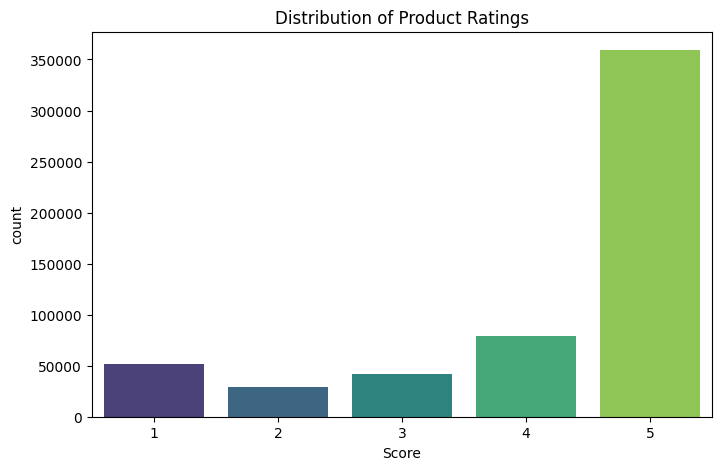

Score
5    64.010635
4    14.151586
1     9.140965
3     7.467195
2     5.229620
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Score', palette='viridis')
plt.title('Distribution of Product Ratings')
plt.show()

print(df['Score'].value_counts(normalize=True)*100)

Most users give high ratings, with 5-star reviews dominating , indicating generally positive feedback on products. Low ratings are relatively rare, showing limited dissatisfaction.

**Temporal Analysis**

C:\Users\giris\AppData\Local\Temp\ipykernel_22792\1005690592.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='magma')


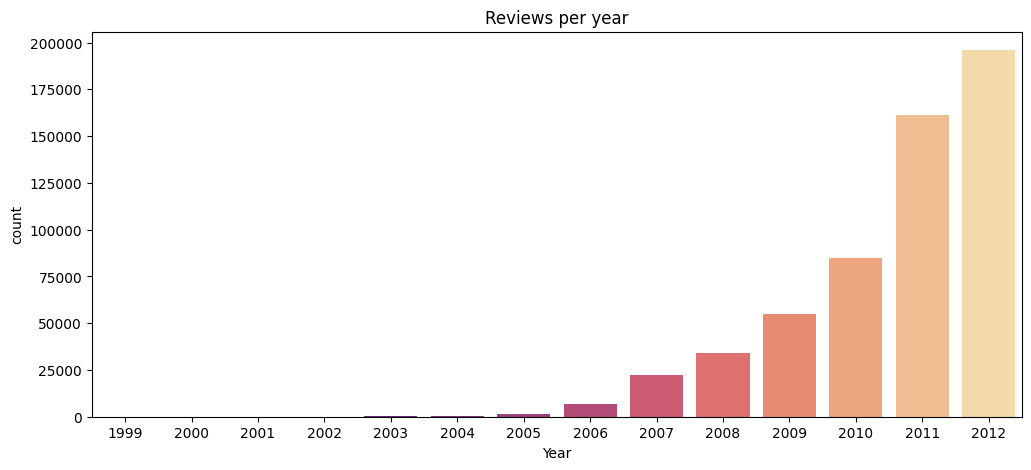

In [11]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month

plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Year', palette='magma')
plt.title('Reviews per year')
plt.show()


**Top Users and Products**

In [15]:
top_users = df['UserId'].value_counts().head(10)
print("Top 10 Users by Reviews count :\n", top_users)


top_products = df['ProductId'].value_counts().head(10)
print("\nTop 10 Products by Reviews count:\n", top_products)

Top 10 Users by Reviews count :
 UserId
A3OXHLG6DIBRW8    443
AY12DBB0U420B     385
A1YUL9PCJR3JTY    361
A281NPSIMI1C2R    341
A1Z54EM24Y40LL    255
A2MUGFV2TDQ47K    201
AQQLWCMRNDFGI     176
A2SZLNSI5KOQJT    169
AZV26LP92E6WU     167
A31N6KB160O508    162
Name: count, dtype: int64

Top 10 Products by Reviews count:
 ProductId
B007JFMH8M    911
B002QWP8H0    630
B002QWHJOU    630
B002QWP89S    630
B0026RQTGE    630
B003B3OOPA    613
B007M832YY    559
B007M83302    559
B0026KPDG8    559
B0013NUGDE    559
Name: count, dtype: int64


A small set of users contribute disproportionately to reviews, highlighting highly active reviewers. Similarly, certain products receive far more reviews than others, suggesting they are either bestsellers or highly popular items.

**Text Analysis: Summary and Review Lengths**

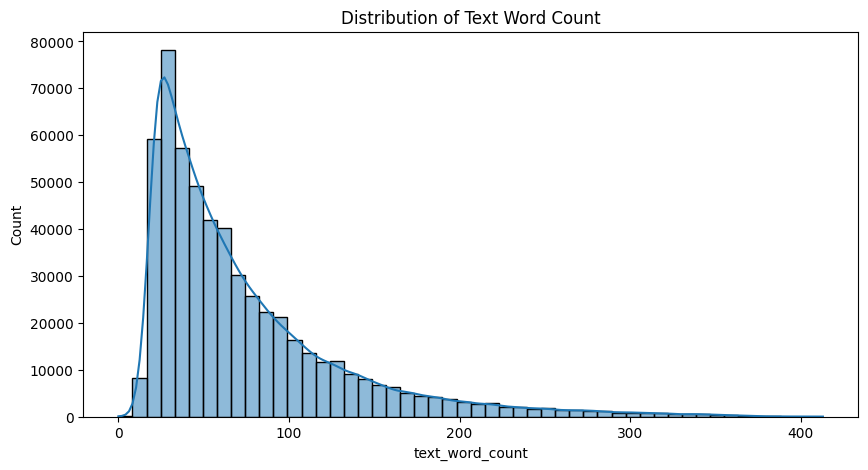

In [ ]:
df['Summary'] = df['Summary'].fillna('')
df['Text'] = df['Text'].fillna('')

df['summary_word_count'] = df['Summary'].apply(lambda x: len(x.split()))
df['text_word_count'] = df['Text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['text_word_count'], bins=50, kde=True)
plt.title("Distribution of Text Word Count")
plt.show()


**Sentiment Analysis**

C:\Users\giris\AppData\Local\Temp\ipykernel_22792\3112540426.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


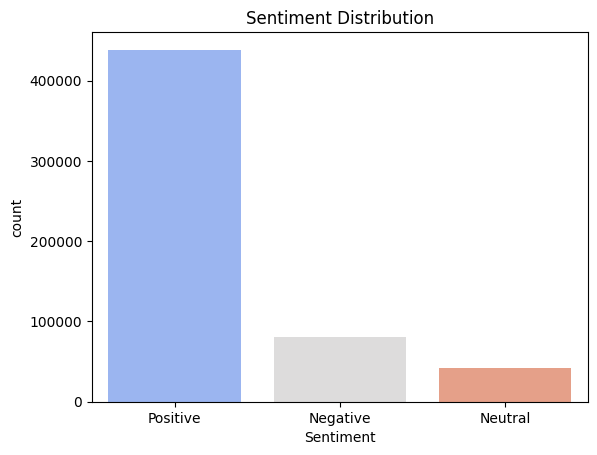

In [18]:
df['Sentiment'] = df['Score'].apply(lambda x: 'Positive' if x>=4 else ('Neutral' if x==3 else 'Negative'))

sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.show()